In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('mass_shooting.csv')
df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2487517,"December 23, 2022",Kansas,Wichita,900 block of S Mission Rd,2,2,NaN
1,2485011,"December 19, 2022",Florida,Lake City,NW Dixie Ave and NW Wright Ln,0,5,NaN
2,2483594,"December 18, 2022",Oklahoma,Oklahoma City,311 S Klein Ave,0,4,NaN
3,2483489,"December 17, 2022",Georgia,Atlanta,3000 Continental Colony Pkwy SW,2,3,NaN
4,2482288,"December 16, 2022",Illinois,Chicago,2150 S Laflin St,2,2,NaN
...,...,...,...,...,...,...,...,...
1995,1543835,"November 7, 2019",Georgia,Conyers,1800 block of Green St,2,3,NaN
1996,1541774,"November 4, 2019",Texas,Houston,5000 block of Northridge Dr,1,4,NaN
1997,1540863,"November 3, 2019",Ohio,Toledo,600 block of Magnolia St,0,4,NaN
1998,1540841,"November 3, 2019",Texas,Nacogdoches,Sandyland Cir and CR 823,1,3,NaN


In [3]:
df.drop(['Incident ID', 'Incident Date','City Or County','Operations','Address'], axis = 1, inplace = True) 


In [4]:
df

,State,# Killed,# Injured
0,Kansas,2,2
1,Florida,0,5
2,Oklahoma,0,4
3,Georgia,2,3
4,Illinois,2,2
...,...,...,...
1995,Georgia,2,3
1996,Texas,1,4
1997,Ohio,0,4
1998,Texas,1,3


In [5]:
# df.groupby(['State'])['# Killed','# Injured'].sum()

In [6]:
df2= pd.read_csv('death.csv')
df2

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2486455,"December 21, 2022",Missouri,Kansas City,8100 block of N Denver Ave,1,0,NaN
1,2485849,"December 20, 2022",Illinois,Chicago,2900 W Redfield Dr,1,0,NaN
2,2485158,"December 19, 2022",Texas,San Angelo,1300 block of Tres Rios Cir,1,0,NaN
3,2484522,"December 19, 2022",South Carolina,Hopkins,1000 block of Weston Rd,1,0,NaN
4,2484508,"December 17, 2022",Indiana,Bloomfield,S Strauser Rd,1,0,NaN
...,...,...,...,...,...,...,...,...
1995,1277170,"December 14, 2018",Michigan,Roseville,16415 Dort St,1,0,NaN
1996,1277695,"December 14, 2018",Louisiana,Alexandria,3900 block of Baker St,1,0,NaN
1997,1275012,"December 11, 2018",Illinois,Round Lake,600 block of W Nippersink Rd,1,0,NaN
1998,1274111,"December 10, 2018",Louisiana,Lafayette,500 Fisher Rd,1,0,NaN


In [7]:
df2.drop(['Incident ID', 'Incident Date','City Or County','Operations','Address'], axis = 1, inplace = True) 
df2

,State,# Killed,# Injured
0,Missouri,1,0
1,Illinois,1,0
2,Texas,1,0
3,South Carolina,1,0
4,Indiana,1,0
...,...,...,...
1995,Michigan,1,0
1996,Louisiana,1,0
1997,Illinois,1,0
1998,Louisiana,1,0


In [8]:
# df2.groupby(['State'])['# Killed','# Injured'].sum()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaled_data1 = scaler.fit_transform(df.iloc[: , 1:])
scaled_data2 = scaler.fit_transform(df2.iloc[: , 1:])

In [18]:
# 1
pca1 = PCA(n_components=0.50)
pca_transformed_data1 = pca1.fit_transform(scaled_data1)
pca1.explained_variance_ratio_.sum()
# 2
pca2 = PCA(n_components=0.50)
pca_transformed_data2 = pca2.fit_transform(scaled_data2)
pca2.explained_variance_ratio_.sum()

0.5542093205440941

In [19]:
tsne1 = TSNE(learning_rate=100)
transformed_features1 = tsne1.fit_transform(pca_transformed_data1)

df['x'] = transformed_features1[:,0]
df['y'] = transformed_features1[:,1]
df['class'] = df['State']

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [20]:
tsne2 = TSNE(learning_rate=100)
transformed_features2 = tsne2.fit_transform(pca_transformed_data2)

df2['x'] = transformed_features2[:,0]
df2['y'] = transformed_features2[:,1]
df2['class'] = df2['State']

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


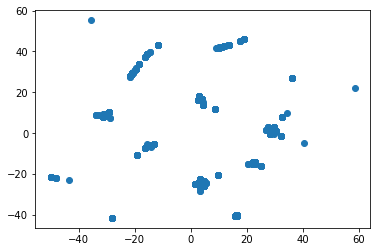

In [22]:
#Mass shooting cluster 
plt.scatter(df["x"], df["y"])
plt.show()

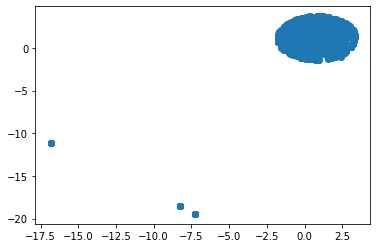

In [23]:
#Deaths cluster 
plt.scatter(df2["x"], df2["y"])
plt.show()

In [29]:
inertia1 = []
k = list(range(1, 15))

# Calculate the inertia for the range of k values
for i in k:
    km1 = KMeans(n_clusters=i, random_state=0)
    km1.fit(scaled_data1)
    inertia1.append(km1.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data1 = {"k": k, "inertia": inertia1}
df_elbow1 = pd.DataFrame(elbow_data1)
df_elbow1.head()

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


,k,inertia
0,1,4000.000000
1,2,2511.836916
2,3,1705.140394
3,4,1274.130918
4,5,1016.645838


In [30]:
inertia2 = []
k = list(range(1, 15))

# Calculate the inertia for the range of k values
for i in k:
    km2 = KMeans(n_clusters=i, random_state=0)
    km2.fit(scaled_data2)
    inertia2.append(km2.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data2 = {"k": k, "inertia": inertia2}
df_elbow2 = pd.DataFrame(elbow_data2)
df_elbow2.head()

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


,k,inertia
0,1,4000.000000
1,2,2181.673220
2,3,1002.106690
3,4,485.348429
4,5,319.003126


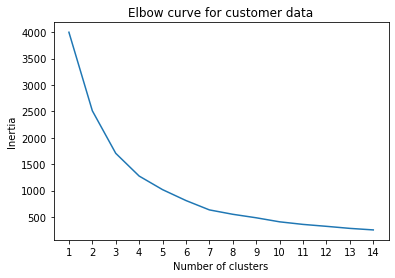

In [31]:
plt.plot(df_elbow1['k'], df_elbow1['inertia'])
plt.xticks(range(1,15))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Mass Shootings')
plt.show()

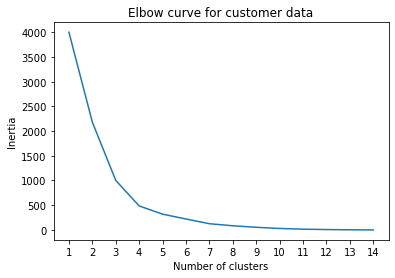

In [36]:
plt.plot(df_elbow2['k'], df_elbow2['inertia'])
plt.xticks(range(1,15))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Death')
plt.show()